# Exploration Notebook Tim

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('ds_salaries.csv')

## Check null values:

In [3]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

No null values - don't need to clean

In [4]:
# Finde alle Duplikate basierend auf allen 11 Spalten
duplicate_rows = df.duplicated(keep=False)

# Extrahiere die duplizierten Zeilen
duplicates = df[duplicate_rows]

# Gib die duplizierten Zeilen aus
print(duplicates)

      work_year experience_level employment_type          job_title  salary  \
5          2023               SE              FT  Applied Scientist  222200   
6          2023               SE              FT  Applied Scientist  136000   
9          2023               SE              FT     Data Scientist  147100   
10         2023               SE              FT     Data Scientist   90700   
11         2023               SE              FT       Data Analyst  130000   
...         ...              ...             ...                ...     ...   
3441       2022               SE              FT      Data Engineer  115000   
3502       2021               MI              FT      Data Engineer  200000   
3586       2021               MI              FT      Data Engineer  200000   
3665       2021               MI              FT     Data Scientist   76760   
3709       2021               MI              FT     Data Scientist   76760   

     salary_currency  salary_in_usd employee_reside

As we can see, we have many duplicate values. However, as it is the case in many companies that the salary is the same for the same attributes, this could correspond to reality. Therefore, it must be checked whether it makes sense to remove the duplicates or not.

In [5]:
df.drop_duplicates(inplace=True)

## Inspect Dataset - columns and rows

In [6]:
print(df.shape)
df.head()

(2584, 11)


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


11 columns with 3755 rows:

4 numeric columns: work_year, salary, salary_in_usd, remote_ratio

7 categorical columns: experience_level, employment_type, job_title, salary_currency, employee_residence, company_location, company_size


In [7]:
df.describe(include='all')

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
count,2584.000000,2584,2584,2584,2.584000e+03,2584,2584.000000,2584,2584.000000,2584,2584
unique,NaN,4,4,93,NaN,20,NaN,78,NaN,72,3
top,NaN,SE,FT,Data Engineer,NaN,USD,NaN,US,NaN,US,M
freq,NaN,1554,2547,598,NaN,2107,NaN,1893,NaN,1929,2028
mean,2022.301084,NaN,NaN,NaN,2.103653e+05,NaN,133409.280186,NaN,50.483746,NaN,NaN
std,0.749179,NaN,NaN,NaN,8.080375e+05,NaN,67136.837329,NaN,48.163707,NaN,NaN
min,2020.000000,NaN,NaN,NaN,6.000000e+03,NaN,5132.000000,NaN,0.000000,NaN,NaN
25%,2022.000000,NaN,NaN,NaN,9.000000e+04,NaN,84975.000000,NaN,0.000000,NaN,NaN
50%,2022.000000,NaN,NaN,NaN,1.346300e+05,NaN,130000.000000,NaN,50.000000,NaN,NaN
75%,2023.000000,NaN,NaN,NaN,1.825625e+05,NaN,175000.000000,NaN,100.000000,NaN,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2584 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           2584 non-null   int64 
 1   experience_level    2584 non-null   object
 2   employment_type     2584 non-null   object
 3   job_title           2584 non-null   object
 4   salary              2584 non-null   int64 
 5   salary_currency     2584 non-null   object
 6   salary_in_usd       2584 non-null   int64 
 7   employee_residence  2584 non-null   object
 8   remote_ratio        2584 non-null   int64 
 9   company_location    2584 non-null   object
 10  company_size        2584 non-null   object
dtypes: int64(4), object(7)
memory usage: 242.2+ KB


In [9]:
df.nunique()

work_year                4
experience_level         4
employment_type          4
job_title               93
salary                 815
salary_currency         20
salary_in_usd         1035
employee_residence      78
remote_ratio             3
company_location        72
company_size             3
dtype: int64

### Inspect interesting values of categorical features:

#### Experience Level

In [10]:
df['experience_level'].unique()

array(['SE', 'MI', 'EN', 'EX'], dtype=object)

There are 4 experience level:

EN - Entry-level

MI - Mid-level

SE - Senior-level

EX - Executive-level

In [11]:
df_display = df.copy()
df_display['experience_level']=df_display['experience_level'].replace('EN','Entry-lvl')
df_display['experience_level']=df_display['experience_level'].replace('MI','Mid-lvl')
df_display['experience_level']=df_display['experience_level'].replace('SE','Senior-lvl')
df_display['experience_level']=df_display['experience_level'].replace('EX','Executive-lvl')

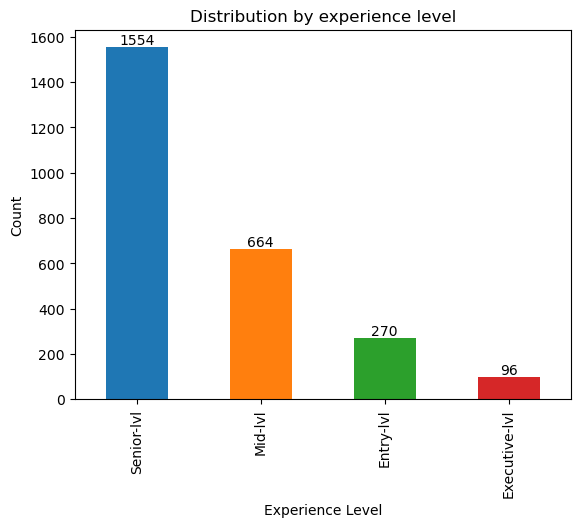

In [12]:
experience_levels = df_display['experience_level'].value_counts()
ax = experience_levels.plot(kind='bar', color=['C0', 'C1', 'C2', 'C3'])
ax.set_title('Distribution by experience level')
ax.set_xlabel('Experience Level')
ax.set_ylabel('Count')

for i, count in enumerate(experience_levels):
    plt.annotate(str(count), xy=(i, count), ha='center', va='bottom')
plt.show()

#### Employment type

In [13]:
df['employment_type'].unique()

array(['FT', 'CT', 'FL', 'PT'], dtype=object)

There are 4 employment types:

PT - Part-time

FT - Full-time

CT - Contract

FL - Freelance

In [14]:
df_display['employment_type']=df_display['employment_type'].replace('PT','Part-time')
df_display['employment_type']=df_display['employment_type'].replace('FT','Full-time')
df_display['employment_type']=df_display['employment_type'].replace('CT','Contract')
df_display['employment_type']=df_display['employment_type'].replace('FL','Freelance')

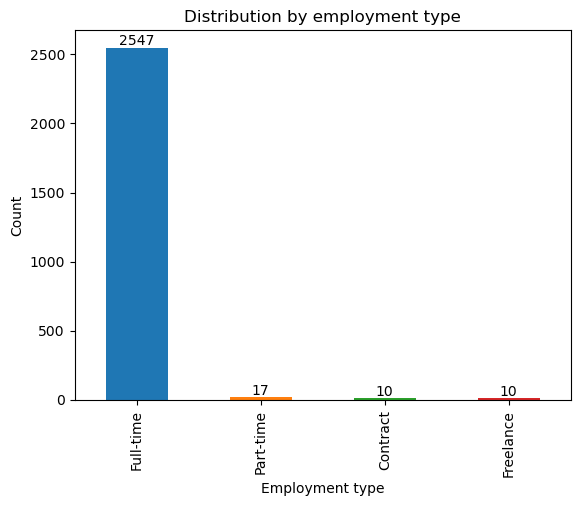

In [15]:
employment_types = df_display['employment_type'].value_counts()
ax = employment_types.plot(kind='bar', color=['C0', 'C1', 'C2', 'C3'])
ax.set_title('Distribution by employment type')
ax.set_xlabel('Employment type')
ax.set_ylabel('Count')

for i, count in enumerate(employment_types):
    plt.annotate(str(count), xy=(i, count), ha='center', va='bottom')
plt.show()

#### Job title

In [16]:
df['job_title'].unique()

array(['Principal Data Scientist', 'ML Engineer', 'Data Scientist',
       'Applied Scientist', 'Data Analyst', 'Data Modeler',
       'Research Engineer', 'Analytics Engineer',
       'Business Intelligence Engineer', 'Machine Learning Engineer',
       'Data Strategist', 'Data Engineer', 'Computer Vision Engineer',
       'Data Quality Analyst', 'Compliance Data Analyst',
       'Data Architect', 'Applied Machine Learning Engineer',
       'AI Developer', 'Research Scientist', 'Data Analytics Manager',
       'Business Data Analyst', 'Applied Data Scientist',
       'Staff Data Analyst', 'ETL Engineer', 'Data DevOps Engineer',
       'Head of Data', 'Data Science Manager', 'Data Manager',
       'Machine Learning Researcher', 'Big Data Engineer',
       'Data Specialist', 'Lead Data Analyst', 'BI Data Engineer',
       'Director of Data Science', 'Machine Learning Scientist',
       'MLOps Engineer', 'AI Scientist', 'Autonomous Vehicle Technician',
       'Applied Machine Learning Sc

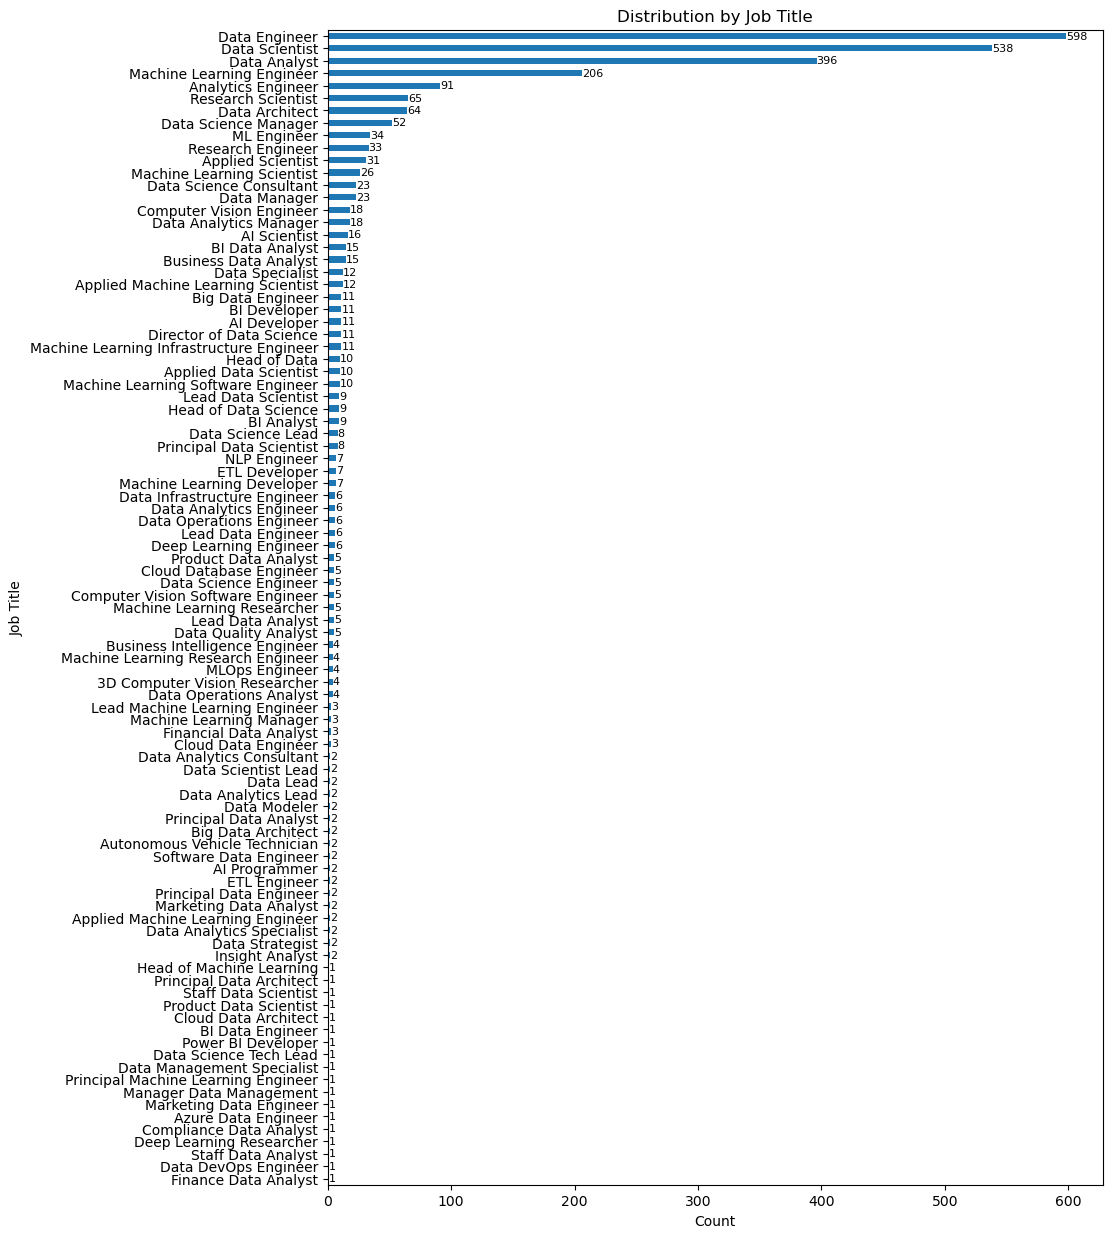

In [17]:
job_title = df['job_title'].value_counts()[::-1]
fig, ax = plt.subplots(figsize=(10, 15))
job_title.plot(kind='barh', color='C0', ax=ax)
ax.set_title('Distribution by Job Title')
ax.set_xlabel('Count')
ax.set_ylabel('Job Title')

for i, count in enumerate(job_title):
    plt.annotate(str(count), xy=(count, i), ha='left', va='center', fontsize=8)
plt.show()

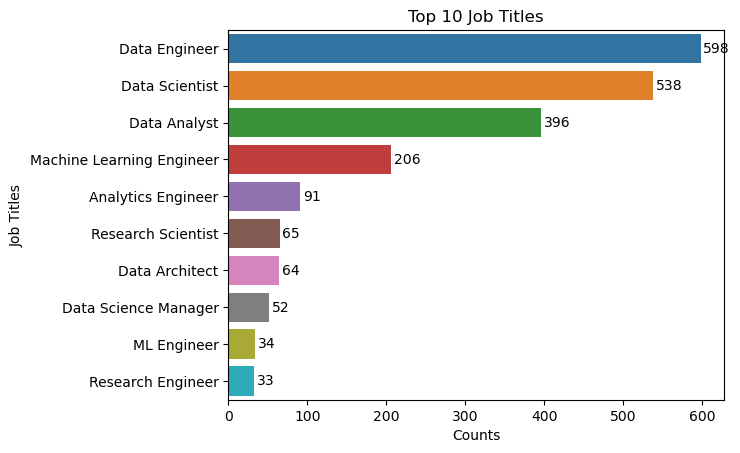

In [18]:
jobs_top10 = df['job_title'].value_counts().nlargest(10).reset_index()
fig, ax = plt.subplots()
ax = sns.barplot(ax=ax, data=df, y=jobs_top10['index'], x=jobs_top10.job_title, palette='tab10')
ax.set(ylabel='Job Titles', xlabel='Counts', title='Top 10 Job Titles')
ax.bar_label(ax.containers[0], padding=2)
plt.show()

#### Company size

In [19]:
df['company_size'].unique()

array(['L', 'S', 'M'], dtype=object)

There are 3 company sizes:

S - Small

M - Medium

L - Large

In [20]:
df_display['company_size']=df_display['company_size'].replace('S','Small')
df_display['company_size']=df_display['company_size'].replace('M','Medium')
df_display['company_size']=df_display['company_size'].replace('L','Large')

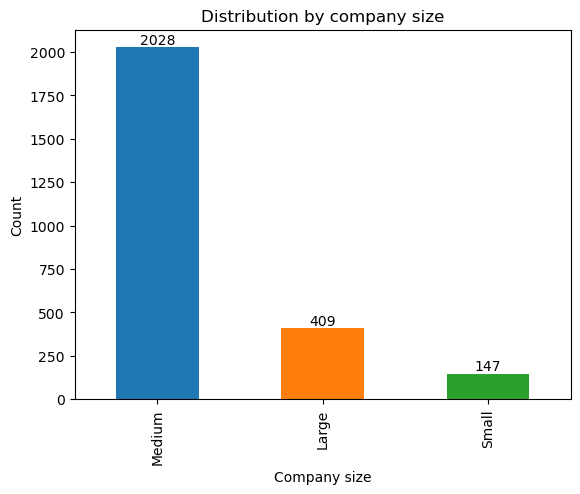

In [21]:
company_sizes = df_display['company_size'].value_counts()
ax = company_sizes.plot(kind='bar', color=['C0', 'C1', 'C2'])
ax.set_title('Distribution by company size')
ax.set_xlabel('Company size')
ax.set_ylabel('Count')

for i, count in enumerate(company_sizes):
    plt.annotate(str(count), xy=(i, count), ha='center', va='bottom')
plt.show()

#### Employee Residence

In [22]:
df['employee_residence'].unique()

array(['ES', 'US', 'CA', 'DE', 'GB', 'NG', 'IN', 'HK', 'PT', 'NL', 'CH',
       'CF', 'FR', 'AU', 'FI', 'UA', 'IE', 'IL', 'GH', 'AT', 'CO', 'SG',
       'SE', 'SI', 'MX', 'UZ', 'BR', 'TH', 'HR', 'PL', 'KW', 'VN', 'CY',
       'AR', 'AM', 'BA', 'KE', 'GR', 'MK', 'LV', 'RO', 'PK', 'IT', 'MA',
       'LT', 'BE', 'AS', 'IR', 'HU', 'SK', 'CN', 'CZ', 'CR', 'TR', 'CL',
       'PR', 'DK', 'BO', 'PH', 'DO', 'EG', 'ID', 'AE', 'MY', 'JP', 'EE',
       'HN', 'TN', 'RU', 'DZ', 'IQ', 'BG', 'JE', 'RS', 'NZ', 'MD', 'LU',
       'MT'], dtype=object)

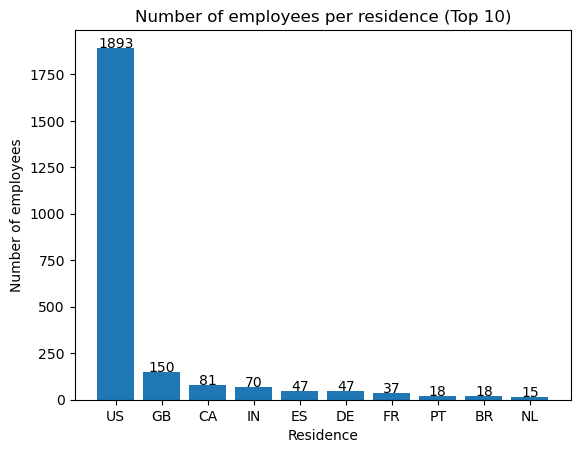

In [23]:
employee_counts = df['employee_residence'].value_counts().sort_values(ascending=False)[:10]

fig, ax = plt.subplots()
ax.bar(employee_counts.index, employee_counts.values)

for i, v in enumerate(employee_counts.values):
    ax.text(i, v + 1, str(v), ha='center')

# Achsenbeschriftung und Titel setzen
ax.set_xlabel('Residence')
ax.set_ylabel('Number of employees')
ax.set_title('Number of employees per residence (Top 10)')

plt.show()

#### Company Location

In [24]:
df['company_location'].unique()

array(['ES', 'US', 'CA', 'DE', 'GB', 'NG', 'IN', 'HK', 'NL', 'CH', 'CF',
       'FR', 'FI', 'UA', 'IE', 'IL', 'GH', 'CO', 'SG', 'AU', 'SE', 'SI',
       'MX', 'BR', 'PT', 'RU', 'TH', 'HR', 'VN', 'EE', 'AM', 'BA', 'KE',
       'GR', 'MK', 'LV', 'RO', 'PK', 'IT', 'MA', 'PL', 'AL', 'AR', 'LT',
       'AS', 'CR', 'IR', 'BS', 'HU', 'AT', 'SK', 'CZ', 'TR', 'PR', 'DK',
       'BO', 'PH', 'BE', 'ID', 'EG', 'AE', 'LU', 'MY', 'HN', 'JP', 'DZ',
       'IQ', 'CN', 'NZ', 'CL', 'MD', 'MT'], dtype=object)

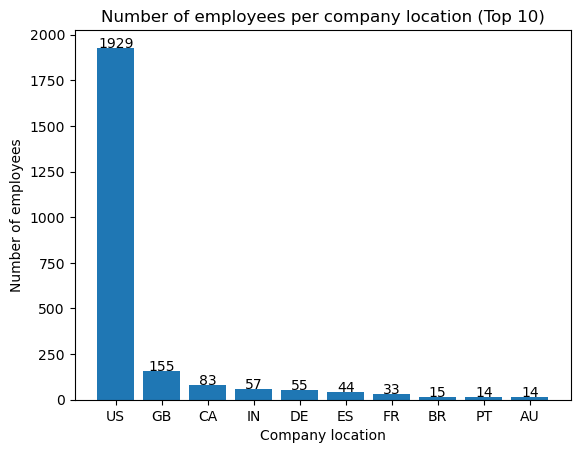

In [25]:
employee_counts = df['company_location'].value_counts().sort_values(ascending=False)[:10]

fig, ax = plt.subplots()
ax.bar(employee_counts.index, employee_counts.values)

for i, v in enumerate(employee_counts.values):
    ax.text(i, v + 1, str(v), ha='center')

# Achsenbeschriftung und Titel setzen
ax.set_xlabel('Company location')
ax.set_ylabel('Number of employees')
ax.set_title('Number of employees per company location (Top 10)')

plt.show()

#### Employee Residence & Company Location

In [26]:
import seaborn as sns
crosstab = pd.crosstab(df['company_location'], df['employee_residence'], margins=True)
print (crosstab)

employee_residence  AE  AM  AR  AS  AT  AU  BA  BE  BG  BO  ...  SI  SK  TH  \
company_location                                            ...               
AE                   3   0   0   0   0   0   0   0   0   0  ...   0   0   0   
AL                   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   
AM                   0   1   0   0   0   0   0   0   0   0  ...   0   0   0   
AR                   0   0   3   0   0   0   0   0   0   0  ...   0   0   0   
AS                   0   0   0   1   0   0   0   0   0   0  ...   0   0   0   
...                 ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ..  ..  ..   
TR                   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   
UA                   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   
US                   0   0   2   0   0   0   0   1   1   2  ...   0   0   0   
VN                   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   
All                  3   1   6   2   6  11   1   5  

In [27]:
not_in_residence = df.loc[~df['company_location'].isin(df['employee_residence']), 'company_location'].unique()
crosstab = crosstab.drop(not_in_residence, axis=0)
print("The following company locations have no matching employee residences: ")
print(not_in_residence)
for location in not_in_residence:
    num_employees = len(df[df['employee_residence'] == location])
    print(f"{location} has {num_employees} employees.")

not_in_location = df.loc[~df['employee_residence'].isin(df['company_location']), 'employee_residence'].unique()
crosstab = crosstab.drop(not_in_location, axis=1)
print("The following employee residences are not in company locations: ")
print(not_in_location)
for residence in not_in_location:
    num_employees = len(df[df['employee_residence'] == residence])
    print(f"{residence} has {num_employees} employees.")

print(crosstab)

The following company locations have no matching employee residences: 
['AL' 'BS']
AL has 0 employees.
BS has 0 employees.
The following employee residences are not in company locations: 
['UZ' 'KW' 'CY' 'DO' 'TN' 'BG' 'JE' 'RS']
UZ has 2 employees.
KW has 1 employees.
CY has 1 employees.
DO has 1 employees.
TN has 1 employees.
BG has 1 employees.
JE has 1 employees.
RS has 1 employees.
employee_residence  AE  AM  AR  AS  AT  AU  BA  BE  BO  BR  ...  SE  SG  SI  \
company_location                                            ...               
AE                   3   0   0   0   0   0   0   0   0   0  ...   0   0   0   
AM                   0   1   0   0   0   0   0   0   0   0  ...   0   0   0   
AR                   0   0   3   0   0   0   0   0   0   0  ...   0   0   0   
AS                   0   0   0   1   0   0   0   0   0   0  ...   0   0   0   
AT                   0   0   0   0   5   0   0   0   0   0  ...   0   0   0   
...                 ..  ..  ..  ..  ..  ..  ..  ..  ..  .

In [28]:
mismatch_locations = df[df['company_location'] != df['employee_residence']]
for location, group in mismatch_locations.groupby('company_location'):
    num_employees = len(group)
    print(f"{num_employees} employees work in {location} but reside in a different location:")
    for index, row in group.iterrows():
        print(f"Employee {index} resides in {row['employee_residence']}")



1 employees work in AL but reside in a different location:
Employee 2022 resides in CA
2 employees work in AS but reside in a different location:
Employee 2807 resides in IN
Employee 3729 resides in IN
1 employees work in AT but reside in a different location:
Employee 3671 resides in DE
5 employees work in AU but reside in a different location:
Employee 736 resides in IN
Employee 856 resides in NG
Employee 1850 resides in PK
Employee 1867 resides in PK
Employee 2120 resides in US
1 employees work in BS but reside in a different location:
Employee 2335 resides in AS
4 employees work in CA but reside in a different location:
Employee 183 resides in NG
Employee 1321 resides in NL
Employee 3539 resides in GB
Employee 3676 resides in US
1 employees work in CH but reside in a different location:
Employee 3705 resides in IN
1 employees work in CN but reside in a different location:
Employee 3621 resides in JE
1 employees work in CR but reside in a different location:
Employee 2206 resides in

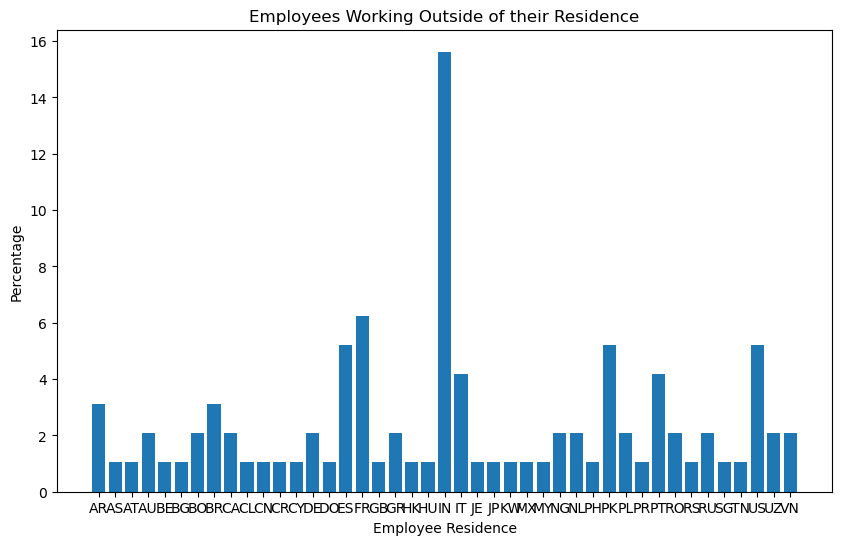

In [29]:
grouped_mismatched_residence = mismatch_locations.groupby('employee_residence').size().reset_index(name='count')

total = grouped_mismatched_residence['count'].sum()
grouped_mismatched_residence['percentage'] = grouped_mismatched_residence['count'] / total * 100

plt.figure(figsize=(10, 6))
plt.bar(grouped_mismatched_residence['employee_residence'], grouped_mismatched_residence['percentage'])
plt.xlabel('Employee Residence')
plt.ylabel('Percentage')
plt.title('Employees Working Outside of their Residence')
plt.show()

96.28% of employees work at their residence location.
3.72% of employees do not work at their residence location.


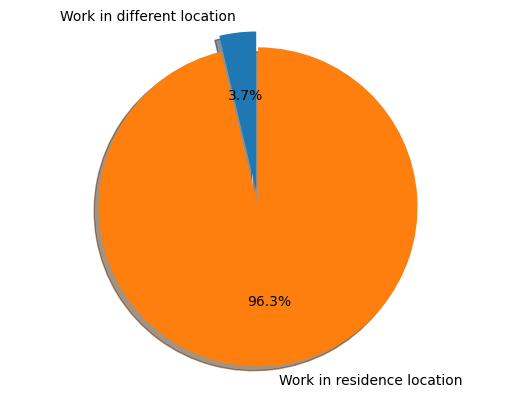

In [30]:
#percentage of employees who work at their residence location
residence_counts = df.groupby(['employee_residence', 'company_location']).size()
total_employees = residence_counts.sum()
residence_work_counts = residence_counts.reset_index(name='count').loc[residence_counts.index.get_level_values('employee_residence') == residence_counts.index.get_level_values('company_location')]
residence_work_sum = residence_work_counts['count'].sum()
residence_work_percent = residence_work_sum / total_employees
print(f"{residence_work_percent:.2%} of employees work at their residence location.")

#percentage of employees who do not work at their residence location
non_residence_work_percent = 1 - residence_work_percent
print(f"{non_residence_work_percent:.2%} of employees do not work at their residence location.")

labels = ['Work in different location', 'Work in residence location']
sizes = [non_residence_work_percent, residence_work_percent]
explode = (0.1, 0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

In [31]:
# filter employees who work in different location
different_location = df[df['employee_residence'] != df['company_location']]
# calculate average salary for employees who work in different location
different_location_avg_salary = different_location['salary_in_usd'].mean()

# filter employees who work at their residence location
residence_location = df[df['employee_residence'] == df['company_location']]
# calculate average salary for employees who work at their residence location
residence_location_avg_salary = residence_location['salary_in_usd'].mean()

# check if employees who work in different location earn more
if different_location_avg_salary > residence_location_avg_salary:
    print("Employees who work in different location earn more.")
    print(f"On average, they earn {different_location_avg_salary - residence_location_avg_salary:.2f} more than employees who work at their residence location.")
else:
    print("Employees who work at their residence location earn more.")
    print(f"On average, they earn {residence_location_avg_salary - different_location_avg_salary:.2f} more than employees who work in different location.")

Employees who work at their residence location earn more.
On average, they earn 67559.23 more than employees who work in different location.


In [32]:
# filter employees who work in different location with same experience level
different_location = df[(df['employee_residence'] != df['company_location']) & (df['experience_level'] == df['experience_level'].shift())]
# calculate average salary for employees who work in different location
different_location_avg_salary = different_location['salary_in_usd'].mean()

# filter employees who work at their residence location with same experience level
residence_location = df[(df['employee_residence'] == df['company_location']) & (df['experience_level'] == df['experience_level'].shift())]
# calculate average salary for employees who work at their residence location
residence_location_avg_salary = residence_location['salary_in_usd'].mean()

# check if employees who work in different location earn more
if different_location_avg_salary > residence_location_avg_salary:
    print("Employees who work in different location and have same experience level earn more.")
    print(f"On average, they earn {different_location_avg_salary - residence_location_avg_salary:.2f} more than employees who work at their residence location.")
else:
    print("Employees who work at their residence location and have same experience level earn more.")
    print(f"On average, they earn {residence_location_avg_salary - different_location_avg_salary:.2f} more than employees who work in different location.")


Employees who work at their residence location and have same experience level earn more.
On average, they earn 57756.40 more than employees who work in different location.


Untersuchung non_residence_work_percent - remote ratio

### Inspect interesting values of numerical features:

#### Remote Ratio

In [33]:
df['remote_ratio'].unique()

array([100,   0,  50], dtype=int64)

Remote Ratio is numerical, but has only 3 values:

0 - No remote work

50 - Partially remote

100 - Full-time remote

Since there are only 3 values, it may makes sense to change remote ratio to a categorical feature: 

In [34]:
df_display['remote_ratio']=df_display['remote_ratio'].replace(0,'No remote')
df_display['remote_ratio']=df_display['remote_ratio'].replace(50,'Partially')
df_display['remote_ratio']=df_display['remote_ratio'].replace(100,'Full-time')

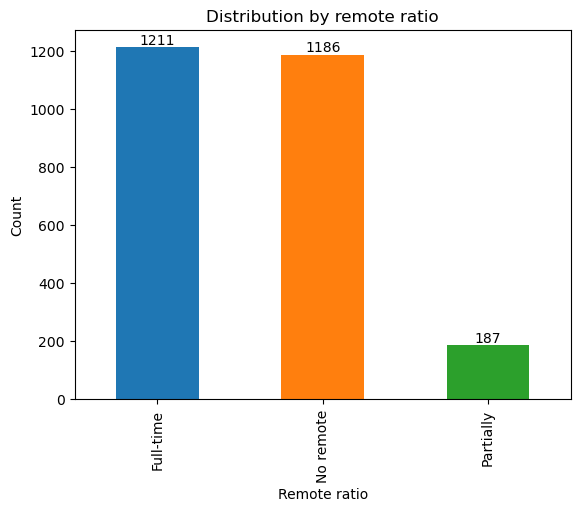

In [35]:
remote_ratios = df_display['remote_ratio'].value_counts()
ax = remote_ratios.plot(kind='bar', color=['C0', 'C1', 'C2'])
ax.set_title('Distribution by remote ratio')
ax.set_xlabel('Remote ratio')
ax.set_ylabel('Count')

for i, count in enumerate(remote_ratios):
    plt.annotate(str(count), xy=(i, count), ha='center', va='bottom')
plt.show()

#### Salary

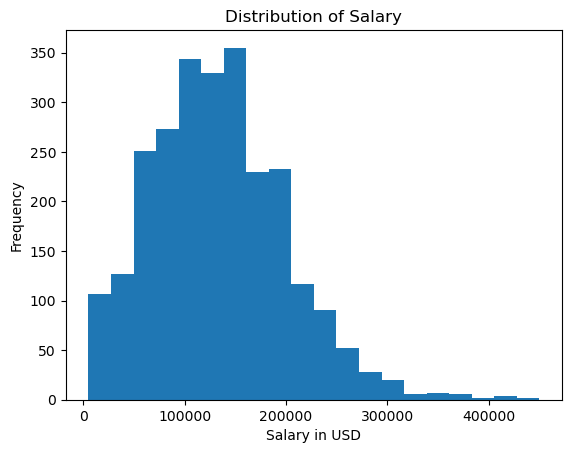

In [36]:
import matplotlib.pyplot as plt

# Daten anzeigen
plt.hist(df['salary_in_usd'], bins=20)
plt.xlabel('Salary in USD')
plt.ylabel('Frequency')
plt.title('Distribution of Salary')
plt.show()

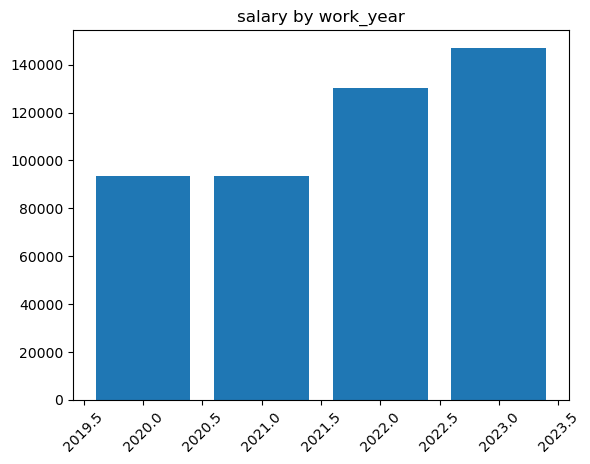

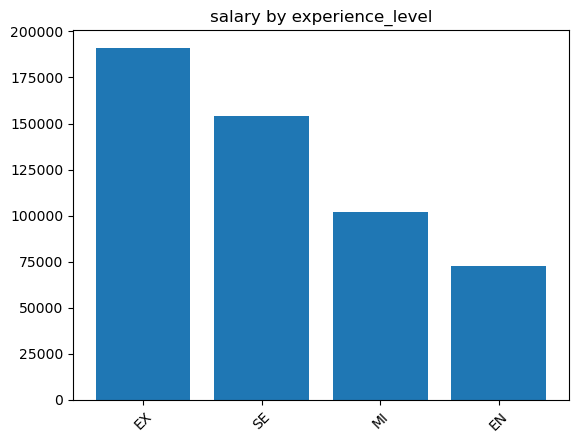

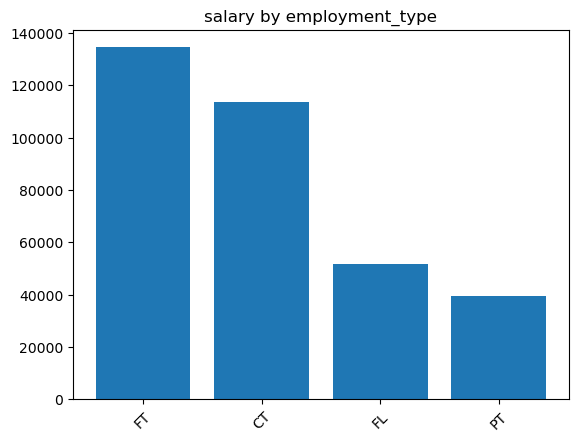

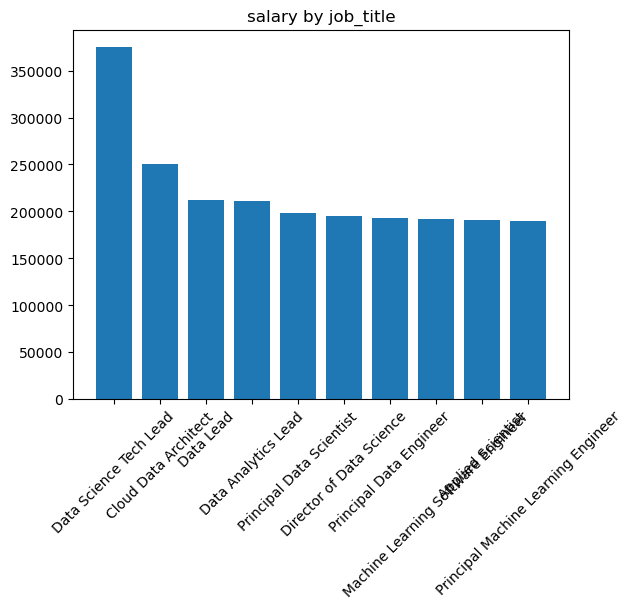

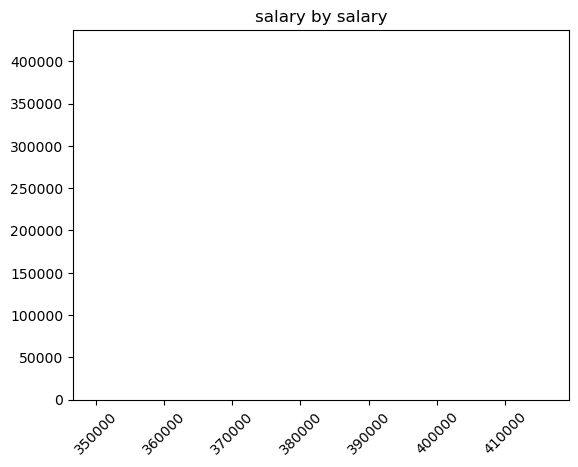

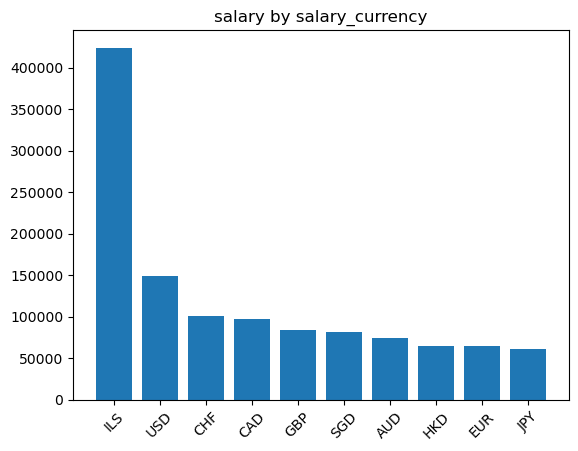

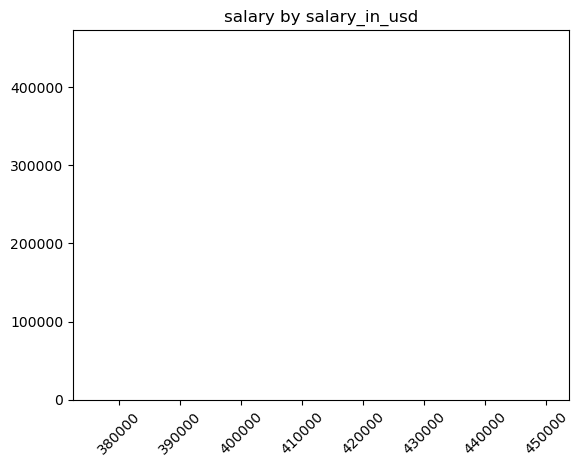

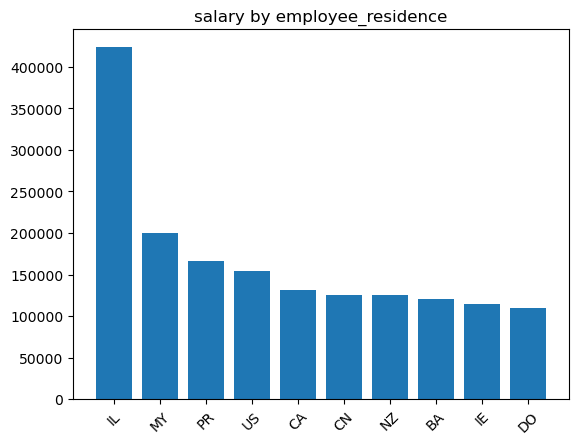

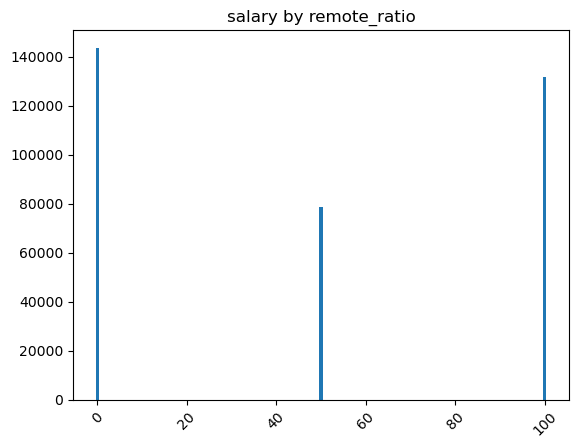

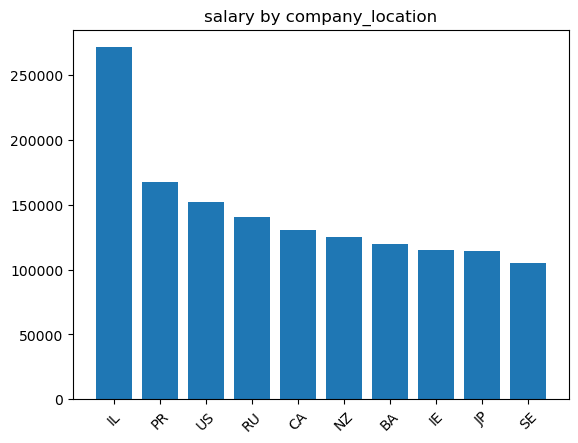

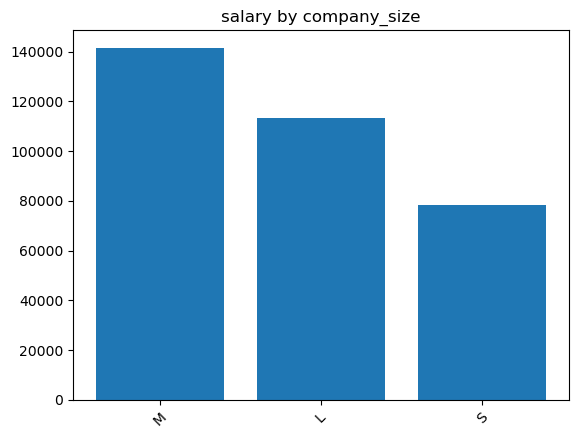

In [37]:
for col in df.columns:
    company_sizes = df.groupby(col).mean().reset_index()
    company_sizes = company_sizes.sort_values('salary_in_usd',ascending = False).head(10)
    plt.bar(company_sizes[col],company_sizes['salary_in_usd'])
    plt.title(f'salary by {col}')
    plt.xticks(rotation=45)

    plt.show()

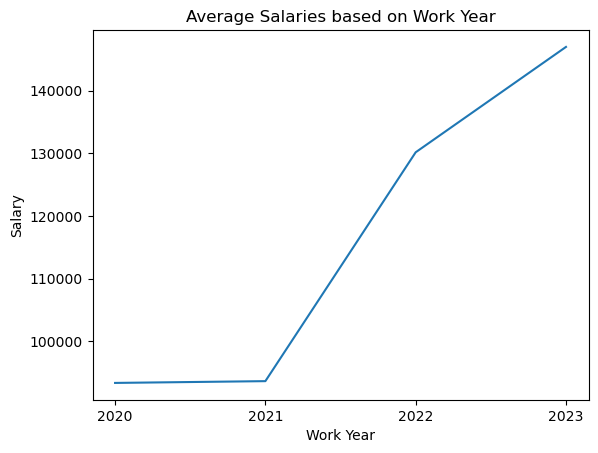

In [38]:
year_based_salary=df['salary_in_usd'].groupby(df['work_year']).mean()
plt.title("Average Salaries based on Work Year")
plt.xlabel('Work Year')
plt.ylabel('Salary')
sns.lineplot(x=['2020', '2021', '2022','2023'],y=year_based_salary)
plt.show()

#### Work year

In [39]:
df['work_year'].unique()

array([2023, 2022, 2020, 2021], dtype=int64)

Work year is numerical, but has only 4 values:

2020, 2021, 2022, 2023

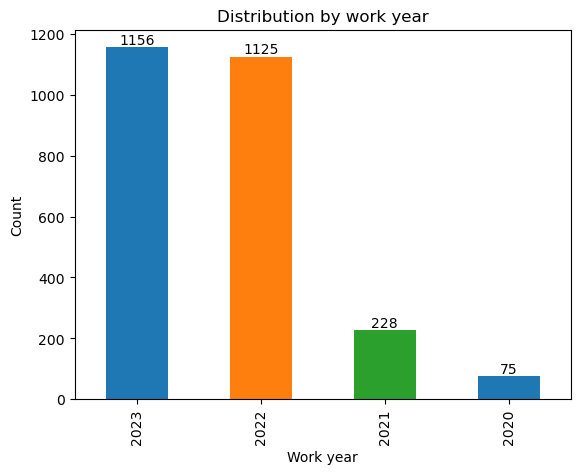

In [40]:
work_years = df_display['work_year'].value_counts()
ax = work_years.plot(kind='bar', color=['C0', 'C1', 'C2'])
ax.set_title('Distribution by work year')
ax.set_xlabel('Work year')
ax.set_ylabel('Count')

for i, count in enumerate(work_years):
    plt.annotate(str(count), xy=(i, count), ha='center', va='bottom')
plt.show()

## Interesting combinations

In [41]:
df_display.groupby(['experience_level','employment_type','work_year']).mean()

salary  salary_in_usd
experience_level employment_type work_year                             
Entry-lvl        Contract        2020       1.000000e+05  100000.000000
                                 2022       2.900000e+04   30469.000000
                 Freelance       2022       7.500000e+04   75000.000000
                 Full-time       2020       4.024842e+05   61665.210526
                                 2021       3.016603e+05   58755.060000
                                 2022       1.783730e+05   70367.178218
                                 2023       1.452522e+05   92363.524390
                 Part-time       2020       1.650000e+04   18817.500000
                                 2021       6.655200e+04   16407.200000
                                 2022       6.762067e+04   67823.333333
                                 2023       7.800000e+04   17779.000000
Executive-lvl    Contract        2021       4.160000e+05  416000.000000
                 Full-time       2020       1.366667e+05  139944.333333
                                 2021       1.521111e+05  160586.666667
                                 2022       3.389763e+05  183837.743590
                                 2023       2.009490e+05  202107.340909
Mid-lvl          Contract        2021       2.700000e+05  270000.000000
                                 2022       3.375000e+04   33750.000000
                                 2023       2.775000e+04   27750.000000
                 Freelance       2021       2.585167e+04   25851.666667
                                 2022       1.250000e+06   65261.500000
                 Full-time       2020       5.332315e+05   87564.718750
                                 2021       8.709624e+05   81444.273810
                                 2022       1.703634e+05  100452.604240
                                 2023       1.652081e+05  114341.563492
                 Part-time       2021       2.295000e+05   37575.000000
                                 2022       5.000000e+04   52533.000000
Senior-lvl       Contract        2021       1.050000e+05  105000.000000
                                 2022       9.000000e+04   90000.000000
                 Freelance       2020       6.000000e+04   60000.000000
                                 2023       5.000000e+04   50000.000000
                 Full-time       2020       1.793647e+05  141784.058824
                                 2021       4.667725e+05  126378.208333
                                 2022       1.708452e+05  149659.372635
                                 2023       1.650848e+05  161029.839586

In [42]:
df_display.groupby(['experience_level','employment_type','company_size']).mean()

work_year        salary  \
experience_level employment_type company_size                              
Entry-lvl        Contract        Large         2020.000000  1.000000e+05   
                                 Medium        2022.000000  2.900000e+04   
                 Freelance       Medium        2022.000000  1.000000e+05   
                                 Small         2022.000000  5.000000e+04   
                 Full-time       Large         2021.857143  1.964695e+05   
                                 Medium        2022.277311  2.079654e+05   
                                 Small         2021.380952  2.388089e+05   
                 Part-time       Large         2022.000000  5.850000e+04   
                                 Medium        2021.500000  5.769000e+04   
                                 Small         2021.000000  6.412067e+04   
Executive-lvl    Contract        Small         2021.000000  4.160000e+05   
                 Full-time       Large         2021.230769  6.238462e+05   
                                 Medium        2022.519481  1.940498e+05   
                                 Small         2021.800000  1.578000e+05   
Mid-lvl          Contract        Large         2021.000000  2.700000e+05   
                                 Medium        2022.000000  7.500000e+03   
                                 Small         2022.666667  3.850000e+04   
                 Freelance       Large         2021.000000  2.000000e+04   
                                 Medium        2021.333333  5.251833e+04   
                                 Small         2022.000000  2.400000e+06   
                 Full-time       Large         2021.500000  7.669782e+05   
                                 Medium        2022.397490  1.275739e+05   
                                 Small         2021.511111  4.647991e+05   
                 Part-time       Large         2021.500000  5.450000e+04   
                                 Medium        2021.000000  4.000000e+05   
Senior-lvl       Contract        Medium        2021.500000  9.750000e+04   
                 Freelance       Medium        2023.000000  5.000000e+04   
                                 Small         2021.500000  5.500000e+04   
                 Full-time       Large         2021.839286  3.924777e+05   
                                 Medium        2022.532836  1.562084e+05   
                                 Small         2021.512195  1.556707e+05   

                                               salary_in_usd  
experience_level employment_type company_size                 
Entry-lvl        Contract        Large         100000.000000  
                                 Medium         30469.000000  
                 Freelance       Medium        100000.000000  
                                 Small          50000.000000  
                 Full-time       Large          73710.989011  
                                 Medium         79610.403361  
                                 Small          62117.809524  
                 Part-time       Large          18517.000000  
                                 Medium         58088.500000  
                                 Small          39661.333333  
Executive-lvl    Contract        Small         416000.000000  
                 Full-time       Large         165363.153846  
                                 Medium        194971.740260  
                                 Small         152992.600000  
Mid-lvl          Contract        Large         270000.000000  
                                 Medium          7500.000000  
                                 Small          38500.000000  
                 Freelance       Large          20000.000000  
                                 Medium         52518.333333  
                                 Small          30523.000000  
                 Full-time       Large          87821.718750  
                                 Medium        110762.278243  
                            